Для выполнения работ P_1, P_2, P_3 сельскохозяйственное предприятие может приобрести тракторы марок А и B стоимостью соответственно c_1 и c_2 ден. ед. каждый. С использованием новой техники необходимо выполнить не менее b_1 условных единиц работы P_1 не менее b_2 условных единиц работы P_2 и не менее b_3 условных единиц работы P_3. За рассматриваемый промежуток времени с использованием трактора марки A можно выполнить a_11 условных единиц работы P_1, a_21 условных единиц работы P_2 или a_31 условных единиц работы P_3; с использованием трактора марки Б – a_12 условных единиц работы P_1, a_22 условных единиц работы P_2 или a_23 условных единиц работы P_3.

Требуется:

 - оставить экономико-математическую модель, позволяющую найти такой вариант приобретения тракторов той или другой марки, при котором будут выполнены все необходимые работы, а затраты на новую технику будут минимальны;
 - Пользуясь методом ветвей и границ, найти оптимальный вариант приобретения тракторов.

b_1 = 20, b_2 = 190, b_3 = 88, a_11 = 4, a_21 = 19, a_31=4, a_12 = 1, a_22 = 15, a_32 = 15, c_1= 3, c_2 = 5

**Решение**:

Целевая функция минимазации затрат на новую технику:

$f=c_{1}\cdot A + c_{2}\cdot B \to min_{A, \space B}$

Ограничения по работам:

$\begin{cases}
a_{11}\cdot A + a_{12}\cdot B \geqslant b_{1}, \\
a_{21}\cdot A + a_{22}\cdot B \geqslant b_{2}, \\
a_{31}\cdot A + a_{32}\cdot B \geqslant b_{3}, \\
A, B \geqslant 0.
\end{cases}$

Графическое решение:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
c_1, c_2 = 3, 5
a_11, a_21, a_31 = 4, 19, 4
a_12, a_22, a_32 = 1, 15, 15
b_1, b_2, b_3 = 20, 190, 88

In [3]:
A = np.linspace(4, 9, 6)
y_2 = np.ones(len(A)) * 10

# расчет B при известном A
# по прямой a_1 * A + a_2 * B = b
def B(A, a_1, a_2, b):
    return (b - a_1 * A) / a_2

*Вспомогательные функции отрисовки условий:*

In [4]:
def draw_line_condition(x, y_1, y_2, color, label):
    plt.plot(x, y_1, color=color, linewidth=2)
    plt.fill_between(x, y_1, y_2, color=color, label=label, alpha=0.1)

# константное условие по A или по B (типа B <= 7)
def draw_const_condition(coord, condition_type, value):
    if condition_type == '\leqslant':
        v_min, v_max = 0, value
    else: # \geqslant
        v_min, v_max = value, 10
    if coord == 'A':
        axline = plt.axvline
        axspan = plt.axvspan
        color = 'red'
    else: # B
        axline = plt.axhline
        axspan = plt.axhspan
        color = 'green'
    axline(value, color=color, linewidth=2)
    axspan(v_min, v_max, alpha=0.1, color=color,
           label=f'${coord} {condition_type} {value}$')   
    plt.legend(loc='upper right')

# группа исходных условий
def draw_initial_conditions(left=0, right=10, bottom=0, top=10):
    plt.figure(figsize=(10, 5))
    for [a_1, a_2, b], color in zip([[a_11, a_12, b_1],
                                     [a_21, a_22, b_2],
                                     [a_31, a_32, b_3]],
                                     ['y', 'b', 'm']):
        draw_line_condition(A, B(A, a_1, a_2, b), y_2, color=color,
                            label=f'${a_1}\cdot A + {a_2}\cdot B \geqslant {b}$')
    plt.xlabel('$A$'); plt.ylabel('$B$')
    plt.xlim(left, right)
    plt.ylim(bottom, top)
    plt.legend(loc='upper right')
    plt.grid(True)    

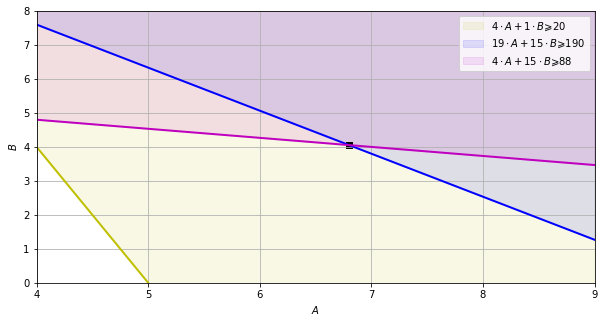

In [5]:
draw_initial_conditions(left=4, right=9, bottom=0, top=8)
plt.scatter(6.8, B(6.8, a_21, a_22, b_2), c='k', marker='s');

Исходная задача имеет решение, которое представляет собой пересение прямых:

$\begin{cases}
19\cdot A + 15\cdot B = 190, \\
4\cdot A + 15\cdot B = 88.
\end{cases}
\Rightarrow
\begin{cases}
A = 6.8, \\
B = 4.053.
\end{cases}$

Значение минимизируемой функции:

In [6]:
A_opt = 6.8
B_opt = B(A_opt, a_21, a_22, b_2)
print(f'({A_opt}, {B_opt:.3f}): {c_1 * A_opt + c_2 * B_opt:.3f}')

(6.8, 4.053): 40.667


Решение не целочисленное, поэтому по методу ветвей и границ поставим подзадачу 1, добавив новое ограничение на переменную $A$ в исходные ограничения:

$\begin{cases}
A \leqslant 6, \\
4\cdot A + 1\cdot B \geqslant 20, \\
19\cdot A + 15\cdot B \geqslant 190, \\
4\cdot A + 15\cdot B \geqslant 88, \\
A, B \geqslant 0.
\end{cases}$

Графическое решение:

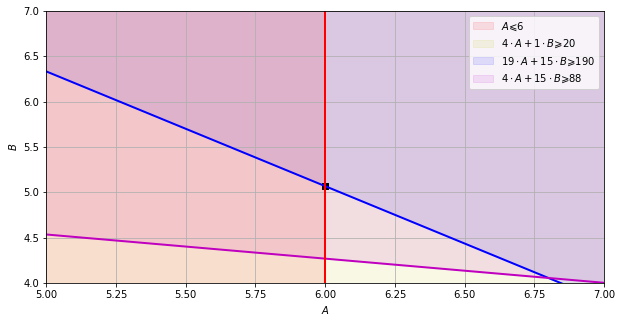

In [7]:
draw_initial_conditions(left=5, right=7, bottom=4, top=7)
draw_const_condition('A', condition_type='\leqslant', value=6)
plt.scatter(6, B(6, a_21, a_22, b_2), c='k', marker='s');

Решение подзадачи 1:

$\begin{cases}
A = 6, \\
19\cdot A + 15\cdot B = 190.
\end{cases}
\Rightarrow
\begin{cases}
A = 6, \\
B = 5.067.
\end{cases}$

Значение минимизируемой функции:

In [8]:
A_opt = 6
B_opt = B(A_opt, a_21, a_22, b_2)
print(f'({A_opt}, {B_opt:.3f}): {c_1 * A_opt + c_2 * B_opt:.3f}')

(6, 5.067): 43.333


Решение снова не целочисленное, поэтому поставим подзадачу 1.1, добавив ограничение на переменную $B$ в ограничения подзадачи 1:

$\begin{cases}
A \leqslant 6, \\
B \leqslant 5, \\
4\cdot A + 1\cdot B \geqslant 20, \\
19\cdot A + 15\cdot B \geqslant 190, \\
4\cdot A + 15\cdot B \geqslant 88, \\
A, B \geqslant 0.
\end{cases}$

Графическое решение:

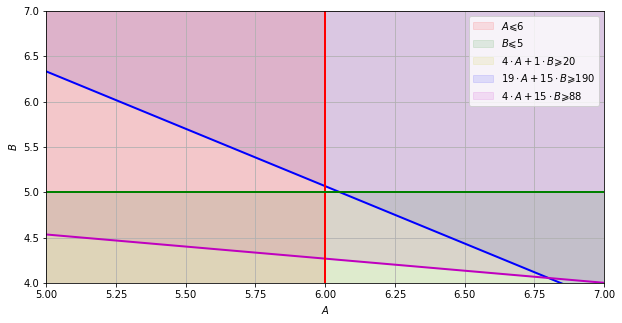

In [9]:
draw_initial_conditions(left=5, right=7, bottom=4, top=7)
draw_const_condition('A', condition_type='\leqslant', value=6)
draw_const_condition('B', condition_type='\leqslant', value=5)

Подзадача 1.1 решения не имеет, поэтому поставим подзадачу 1.2, добавив другое ограничение на переменную $B$ в ограничения подзадачи 1:

$\begin{cases}
A \leqslant 6, \\
B \geqslant 6, \\
4\cdot A + 1\cdot B \geqslant 20, \\
19\cdot A + 15\cdot B \geqslant 190, \\
4\cdot A + 15\cdot B \geqslant 88, \\
A, B \geqslant 0.
\end{cases}$

Графическое решение:

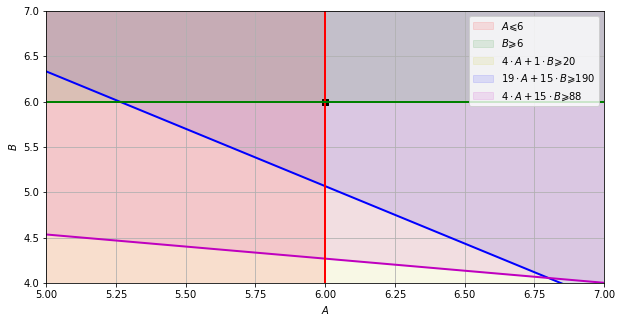

In [10]:
draw_initial_conditions(left=5, right=7, bottom=4, top=7)
draw_const_condition('A', condition_type='\leqslant', value=6)
draw_const_condition('B', condition_type='\geqslant', value=6)
plt.scatter(6, 6, c='k', marker='s');

Подзадача 1.2 имеет целочисленное решение (6, 6). Подставим его в минимизируемую функцию:

In [11]:
A_opt = 6
B_opt = 6
print(f'({A_opt}, {B_opt}): {c_1 * A_opt + c_2 * B_opt}')

(6, 6): 48


По методу ветвей и границ пойдем в другую сторону и поставим подзадачу 2, добавив другое ограничение на переменную $A$ в исходные ограничения:

$\begin{cases}
A \geqslant 7, \\
4\cdot A + 1\cdot B \geqslant 20, \\
19\cdot A + 15\cdot B \geqslant 190, \\
4\cdot A + 15\cdot B \geqslant 88, \\
A, B \geqslant 0.
\end{cases}$

Графическое решение:

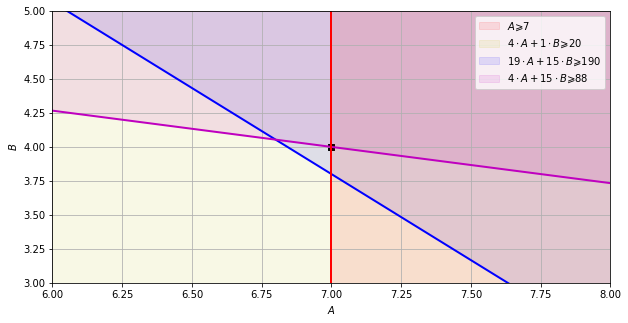

In [12]:
draw_initial_conditions(left=6, right=8, bottom=3, top=5)
draw_const_condition('A', condition_type='\geqslant', value=7)
plt.scatter(7, 4, c='k', marker='s');

Подзадача 2 имеет целочисленное решение (поэтому деление на подзадачи останавливаем):
    
$\begin{cases}
A = 7, \\
4\cdot A + 15\cdot B = 88.
\end{cases}
\Rightarrow
\begin{cases}
A = 7, \\
B = 4.
\end{cases}$

Подставим его в минимизируемую функцию:

In [13]:
A_opt = 7
B_opt = 4
print(f'({A_opt}, {B_opt}): {c_1 * A_opt + c_2 * B_opt}')

(7, 4): 41


Значение функции в этой точке меньше, чем в точке, соответствующей целочисленному решению подзадачи 1.2 (48), поэтому точка (7, 4) - решение исходной задачи.

**Ответ**: $A$ = 7, $B$ = 4.